In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Test on single image

In [3]:
image_path = '/home/clr/Thesis/augmentations/Humerus/MURA-v1.1-train-XR_HUMERUS-patient00058-study1_negative-image1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

height, width = image.shape
image_2d = image.reshape((height * width, 1))

n_clusters = 2
threshold =  110

kmeans = KMeans(n_clusters=n_clusters , init=np.array([[0], [255]]))
kmeans.fit(image_2d)

cluster_centers = kmeans.cluster_centers_
cluster_centers[cluster_centers <= threshold] = 0
cluster_centers[cluster_centers > threshold] = 70
kmeans.cluster_centers_ = cluster_centers

cluster_labels = kmeans.predict(image_2d)

# Reshape the cluster labels back to the original image shape
segmented_image = cluster_labels.reshape((height, width))

# Create a mask for each cluster
segment_masks = []
for cluster_id in range(n_clusters):
    mask = np.zeros_like(segmented_image, dtype=np.uint8)
    mask[segmented_image == cluster_id] = 255
    segment_masks.append(mask)


Text(0.5, 1.0, 'chosen mask')

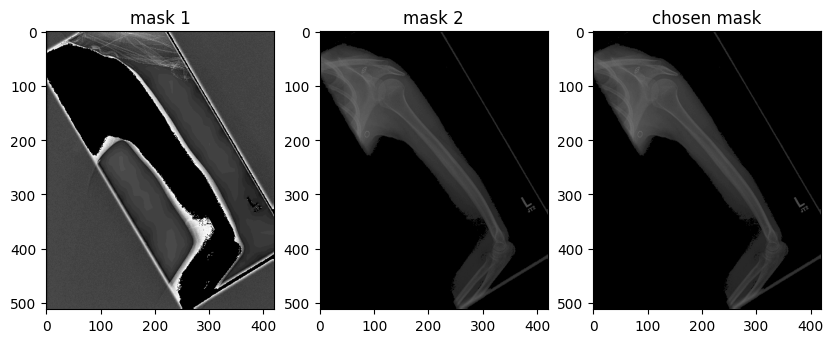

In [5]:

image_masked1 = cv2.bitwise_and(image, image, mask=segment_masks[0])
image_masked2 = cv2.bitwise_and(image, image, mask=segment_masks[1])

blackPxNum_mask1 = np.count_nonzero([image_masked1<=70]) #number of black pixels
blackPxNum_mask2 = np.count_nonzero([image_masked2<=70]) #number of black pixels

if blackPxNum_mask1 < blackPxNum_mask2:
	chosen_mask = image_masked1
else:
	chosen_mask = image_masked2

original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image_masked1, cmap='gray')
ax[0].set_title("mask 1")
ax[1].imshow(image_masked2, cmap='gray')
ax[1].set_title("mask 2")
ax[2].imshow(chosen_mask, cmap='gray')
ax[2].set_title("chosen mask")

## Loop on multiple images

In [ ]:
import kmeans

folder_path = '/home/clr/Thesis/augmentations/kMeans_segment/sample images/'
output_path = '/home/clr/Thesis/augmentations/kMeans_segment/kmeans_segment/'
kmeans = kmeans.kmeans_segment(folder_path, output_path)